In [1]:
import pandas as pd
import numpy as np

from coactivation.process import preprocess_emgs, get_coactivation_map, emgs, mirror_left_right_emgs, get_coactivation_difference, get_stratified_cm,  mirror_left_right, get_all_healthy_map, array_to_cm
from coactivation.visualize import visualize_emgs, plot_coactivation_map, plot_one_class_coactivation_map, visualize_stratified_median_emgs

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

from matplotlib.colors import LinearSegmentedColormap

In [2]:
df = pd.read_csv('coactivations.csv')
df

,Unnamed: 0,gt0emg0,gt0emg1,gt0emg2,gt0emg3,gt0emg4,gt0emg5,gt0emg6,gt0emg7,gt1emg0,...,gt2emg2,gt2emg3,gt2emg4,gt2emg5,gt2emg6,gt2emg7,hand,is_patient,subject_id,n
0,0,0.112426,0.144828,0.090129,0.032012,0.021463,0.034722,0.032702,0.073077,0.159763,...,0.326180,0.332317,0.175610,0.364583,0.337349,0.265385,left,False,fa,11
1,0,0.077551,0.114130,0.080769,0.031250,0.019319,0.030645,0.030405,0.070896,0.106122,...,0.253846,0.251563,0.121435,0.177419,0.327703,0.354478,left,False,fa,11
2,0,0.083333,0.099138,0.074586,0.046707,0.033912,0.046610,0.028646,0.038760,0.100000,...,0.237569,0.258683,0.143533,0.223164,0.236979,0.157946,left,False,fa,13
3,0,0.048140,0.089404,0.090395,0.075780,0.062963,0.072886,0.024476,0.025200,0.059081,...,0.262712,0.337296,0.165278,0.214286,0.165210,0.113402,left,False,fa,13
4,0,0.041379,0.210054,0.064480,0.028322,0.082822,0.177632,0.086310,0.042386,0.073892,...,0.162896,0.153595,0.159509,0.217105,0.122024,0.171115,right,False,xw,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,0,0.038596,0.530973,0.061437,0.037736,0.159624,0.175141,0.100000,0.043088,0.069006,...,0.149338,0.320755,0.333333,0.242938,0.148000,0.111311,right,False,yc,13
157,0,0.020871,0.042484,0.021891,0.029248,0.079365,0.202247,0.024000,0.047368,0.093466,...,0.109453,0.451253,0.257937,0.393258,0.298667,0.252632,right,False,is,11
158,0,0.022989,0.043643,0.024819,0.096308,0.132530,0.206522,0.023873,0.021991,0.091954,...,0.080662,0.451043,0.331325,0.358696,0.401857,0.215278,right,False,is,11
159,0,0.023649,0.044402,0.028495,0.186480,0.158940,0.315315,0.035629,0.017889,0.042793,...,0.089047,0.312354,0.284768,0.423423,0.157957,0.290698,right,False,is,13


In [3]:
dfgt = pd.read_csv('coactivations_by_gt.csv')
dfgt

,Unnamed: 0,window,gt,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7,hand,is_patient,subject_id,date,n
0,0,0,0,0.112426,0.151724,0.094421,0.033537,0.020488,0.034722,0.032702,0.076923,left,False,fa,2023_10_16,11
1,1,1,1,0.147929,0.200000,0.154506,0.112805,0.195122,0.333333,0.125645,0.115385,left,False,fa,2023_10_16,11
2,2,2,0,0.112426,0.144828,0.090129,0.032012,0.023415,0.050347,0.049914,0.073077,left,False,fa,2023_10_16,11
3,3,3,2,0.213018,0.241379,0.278970,0.309451,0.139512,0.361111,0.327022,0.246154,left,False,fa,2023_10_16,11
4,4,4,0,0.112426,0.144828,0.090129,0.032012,0.021463,0.032986,0.032702,0.076923,left,False,fa,2023_10_16,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1784,1784,8,0,0.021898,0.043651,0.029326,0.188759,0.164430,0.205674,0.034301,0.016874,right,False,is,2023_11_03,13
1785,1785,9,1,0.059437,0.347222,0.593353,0.635207,0.204698,0.262411,0.048813,0.135435,right,False,is,2023_11_03,13
1786,1786,10,0,0.021898,0.043651,0.030792,0.147402,0.137584,0.226950,0.038259,0.017762,right,False,is,2023_11_03,13
1787,1787,11,2,0.423879,0.351190,0.046921,0.290562,0.281879,0.304965,0.248021,0.325044,right,False,is,2023_11_03,13


# Similarity Research: Between coactivations

## PCA analysis

### across intents

In [4]:
filter_healthy = dfgt.is_patient==False
filter_rest = dfgt['gt']==0
filter_close = dfgt['gt']==2
filter_open = dfgt['gt']==1

dfgt_healthy = mirror_left_right_emgs(dfgt)[filter_healthy].iloc[:, 2:10]
dfgt_healthy_rest = mirror_left_right_emgs(dfgt)[filter_healthy & filter_rest].iloc[:, 2:10]
dfgt_healthy_open = mirror_left_right_emgs(dfgt)[filter_healthy & filter_open].iloc[:, 2:10]
dfgt_healthy_close = mirror_left_right_emgs(dfgt)[filter_healthy & filter_close].iloc[:, 2:10]

KeyboardInterrupt: 

In [ ]:
dfgt_healthy

,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7
0,0.032702,0.034722,0.020488,0.033537,0.094421,0.151724,0.112426,0.076923
1,0.125645,0.333333,0.195122,0.112805,0.154506,0.200000,0.147929,0.115385
2,0.049914,0.050347,0.023415,0.032012,0.090129,0.144828,0.112426,0.073077
3,0.327022,0.361111,0.139512,0.309451,0.278970,0.241379,0.213018,0.246154
4,0.032702,0.032986,0.021463,0.032012,0.090129,0.144828,0.112426,0.076923
...,...,...,...,...,...,...,...,...
1784,0.021898,0.043651,0.029326,0.188759,0.164430,0.205674,0.034301,0.016874
1785,0.059437,0.347222,0.593353,0.635207,0.204698,0.262411,0.048813,0.135435
1786,0.021898,0.043651,0.030792,0.147402,0.137584,0.226950,0.038259,0.017762
1787,0.423879,0.351190,0.046921,0.290562,0.281879,0.304965,0.248021,0.325044


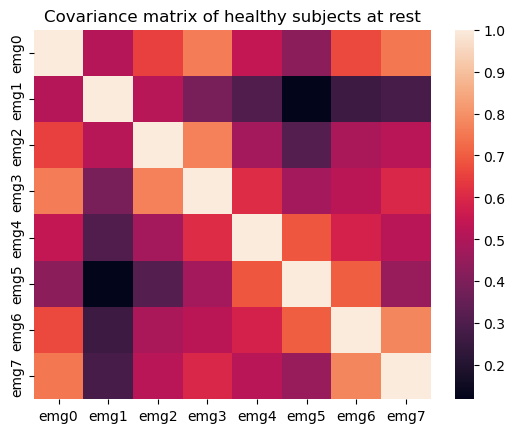

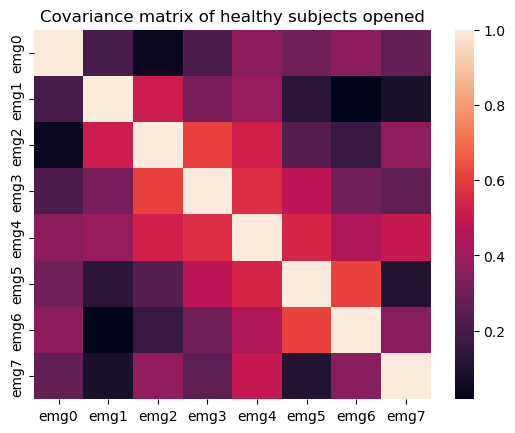

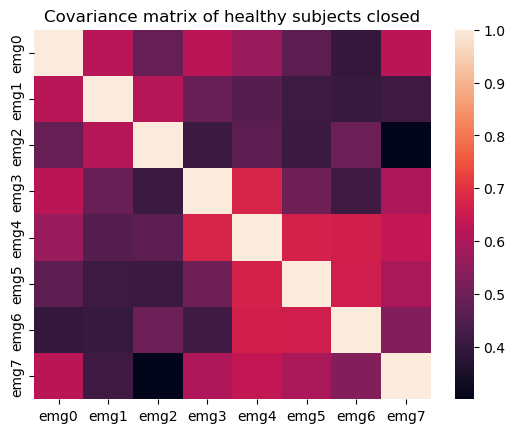

In [ ]:
Z = (dfgt_healthy_rest - dfgt_healthy_rest.mean())/dfgt_healthy_rest.std()
c = Z.cov()
sns.heatmap(c)
plt.title('Covariance matrix of healthy subjects at rest')
plt.show()
Z = (dfgt_healthy_open- dfgt_healthy_open.mean())/dfgt_healthy_open.std()
c = Z.cov()
sns.heatmap(c)
plt.title('Covariance matrix of healthy subjects opened')
plt.show()
Z = (dfgt_healthy_close - dfgt_healthy_close.mean())/dfgt_healthy_close.std()
c = Z.cov()
sns.heatmap(c)
plt.title('Covariance matrix of healthy subjects closed')
plt.show()

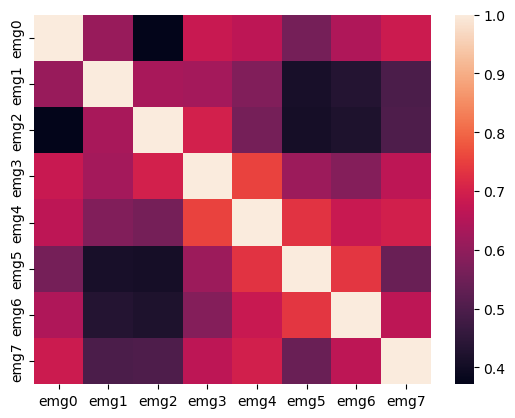

In [ ]:
Z = (dfgt_healthy - dfgt_healthy.mean())/dfgt_healthy.std()
c = Z.cov()
sns.heatmap(c)
plt.show()

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(c)
print('Eigen values:\n', eigenvalues)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)
# Index the eigenvalues in descending order 
idx = eigenvalues.argsort()[::-1]
# Sort the eigenvalues in descending order 
eigenvalues = eigenvalues[idx]
# sort the corresponding eigenvectors accordingly
eigenvectors = eigenvectors[:,idx]
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
explained_var

Eigen values:
 [5.18790492 0.90148867 0.56423083 0.42845219 0.14602297 0.33097581
 0.25336502 0.18755958]
Eigen values Shape: (8,)
Eigen Vector Shape: (8, 8)


array([0.64848812, 0.7611742 , 0.83170305, 0.88525958, 0.92663155,
       0.95830218, 0.98174713, 1.        ])

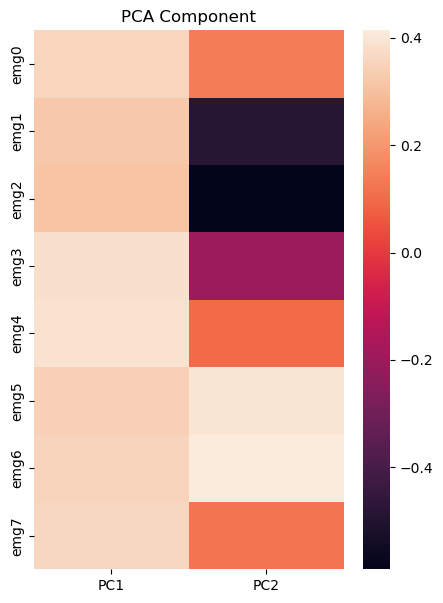

In [ ]:
# PCA component or unit matrix
n_components=2
u = eigenvectors[:,:n_components]
pca_component = pd.DataFrame(u,
                             index = emgs,
                             columns = ['PC1','PC2']
                            )

# plotting heatmap
plt.figure(figsize =(5, 7))
sns.heatmap(pca_component)
plt.title('PCA Component')
plt.show()

### across people

In [ ]:
df_healthy = mirror_left_right_emgs(df)[filter_healthy].iloc[:, 1:25]
df_healthy

/var/folders/yd/vqpl9gqn5nqfzr41g9_g0t940000gq/T/ipykernel_33592/4005515746.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_healthy = mirror_left_right_emgs(df)[filter_healthy].iloc[:, 1:25]


,gt0emg0,gt0emg1,gt0emg2,gt0emg3,gt0emg4,gt0emg5,gt0emg6,gt0emg7,gt1emg0,gt1emg1,...,gt1emg6,gt1emg7,gt2emg0,gt2emg1,gt2emg2,gt2emg3,gt2emg4,gt2emg5,gt2emg6,gt2emg7
0,0.112426,0.144828,0.090129,0.032012,0.021463,0.034722,0.032702,0.073077,0.159763,0.220690,...,0.130809,0.161538,0.301775,0.317241,0.326180,0.332317,0.175610,0.364583,0.337349,0.265385
1,0.077551,0.114130,0.080769,0.031250,0.019319,0.030645,0.030405,0.070896,0.106122,0.163043,...,0.104730,0.141791,0.387755,0.347826,0.253846,0.251563,0.121435,0.177419,0.327703,0.354478
2,0.083333,0.099138,0.074586,0.046707,0.033912,0.046610,0.028646,0.038760,0.100000,0.125000,...,0.062500,0.060078,0.341667,0.250000,0.237569,0.258683,0.143533,0.223164,0.236979,0.157946
3,0.048140,0.089404,0.090395,0.075780,0.062963,0.072886,0.024476,0.025200,0.059081,0.105960,...,0.042832,0.045819,0.221007,0.221854,0.262712,0.337296,0.165278,0.214286,0.165210,0.113402
4,0.041379,0.210054,0.064480,0.028322,0.082822,0.177632,0.086310,0.042386,0.073892,0.461400,...,0.125000,0.065934,0.211330,0.342908,0.162896,0.153595,0.159509,0.217105,0.122024,0.171115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,0.038596,0.530973,0.061437,0.037736,0.159624,0.175141,0.100000,0.043088,0.069006,0.557522,...,0.124000,0.061041,0.343860,0.469027,0.149338,0.320755,0.333333,0.242938,0.148000,0.111311
157,0.020871,0.042484,0.021891,0.029248,0.079365,0.202247,0.024000,0.047368,0.093466,0.428105,...,0.034667,0.073684,0.243648,0.375817,0.109453,0.451253,0.257937,0.393258,0.298667,0.252632
158,0.022989,0.043643,0.024819,0.096308,0.132530,0.206522,0.023873,0.021991,0.091954,0.466793,...,0.034483,0.034722,0.238506,0.335863,0.080662,0.451043,0.331325,0.358696,0.401857,0.215278
159,0.023649,0.044402,0.028495,0.186480,0.158940,0.315315,0.035629,0.017889,0.042793,0.303089,...,0.039192,0.031306,0.185811,0.212355,0.089047,0.312354,0.284768,0.423423,0.157957,0.290698


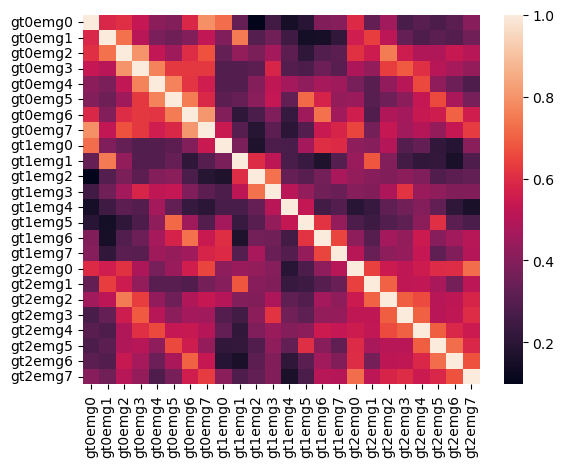

In [ ]:
Z = (df_healthy - df_healthy.mean())/df_healthy.std()
c = Z.cov()
sns.heatmap(c)
plt.show()

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(c)
print('Eigen values:\n', eigenvalues)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)
# Index the eigenvalues in descending order 
idx = eigenvalues.argsort()[::-1]
# Sort the eigenvalues in descending order 
eigenvalues = eigenvalues[idx]
# sort the corresponding eigenvectors accordingly
eigenvectors = eigenvectors[:,idx]
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
explained_var

Eigen values:
 [11.34447188  2.11969877  1.9194286   1.61923494  1.40196469  0.99990828
  0.9180783   0.65523827  0.55779453  0.45979073  0.36327273  0.30574804
  0.27246012  0.21968414  0.18135484  0.16807194  0.11606825  0.09816935
  0.07431045  0.06623534  0.02575427  0.04334022  0.03261421  0.0373071 ]
Eigen values Shape: (24,)
Eigen Vector Shape: (24, 24)


array([0.47268633, 0.56100711, 0.6409833 , 0.70845142, 0.76686662,
       0.80852947, 0.84678273, 0.87408432, 0.89732576, 0.91648371,
       0.93162007, 0.94435957, 0.95571208, 0.96486558, 0.97242204,
       0.97942503, 0.98426121, 0.9883516 , 0.99144787, 0.99420767,
       0.99601352, 0.99756798, 0.99892691, 1.        ])

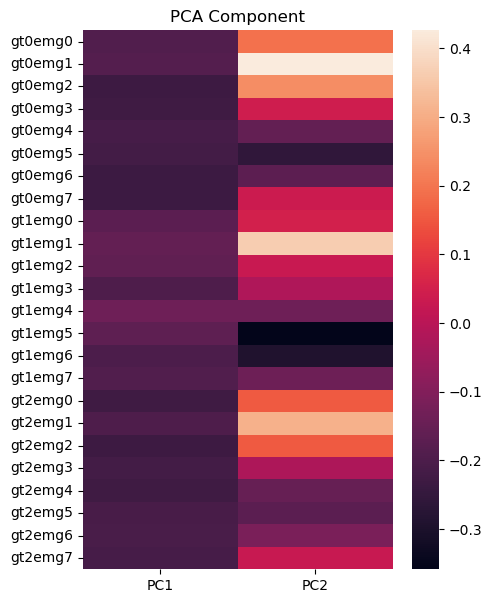

In [ ]:
# PCA component or unit matrix
n_components=2
u = eigenvectors[:,:n_components]
pca_component = pd.DataFrame(u,
                             index = df_healthy.columns,
                             columns = ['PC1','PC2']
                            )

# plotting heatmap
plt.figure(figsize =(5, 7))
sns.heatmap(pca_component)
plt.title('PCA Component')
plt.show()

## Comparing methods of existing, well-known similarity metrics


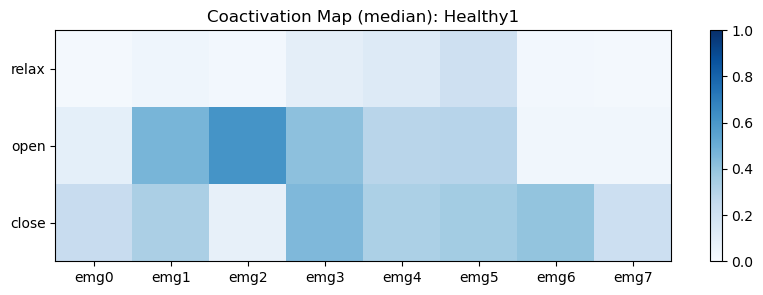

In [ ]:
# for now, workign with 50hz
healthy1 = get_coactivation_map(preprocess_emgs('collected_data/2023_11_03_is/is_111.csv'))
plot_coactivation_map(healthy1,title='Healthy1')

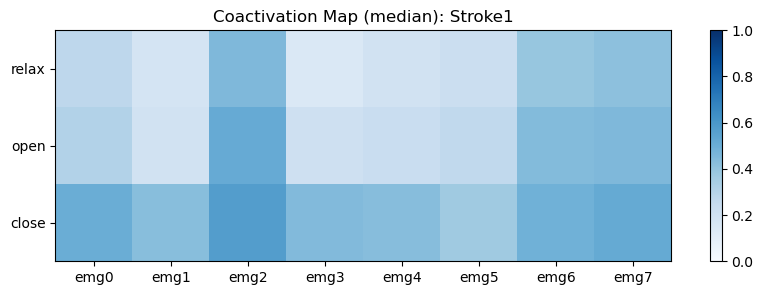

In [ ]:
stroke1 = get_coactivation_map(preprocess_emgs('collected_data/2024_01_11_p12/p12_111.csv'))
plot_coactivation_map(stroke1,title='Stroke1')

emg,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7
gt,,,,,,,,
0,0.345238,0.576271,0.629630,0.491803,0.225806,0.349398,0.453125,0.341772
1,0.559524,0.694915,0.703704,0.639344,0.574194,0.638554,0.625000,0.544304
2,0.547619,0.694915,0.703704,0.639344,0.541935,0.662651,0.656250,0.556962


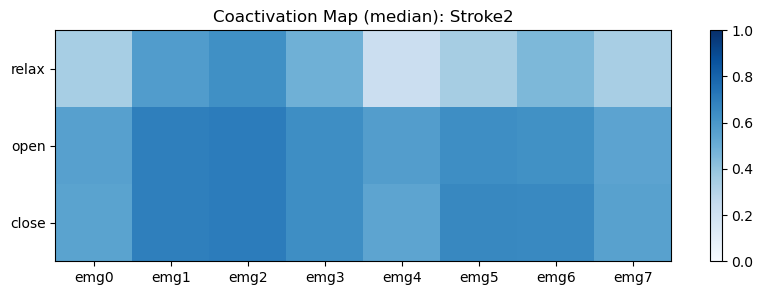

In [ ]:
stroke2 = get_coactivation_map(preprocess_emgs('collected_data/2024_01_10_p13/p13_111.csv'))
plot_coactivation_map(stroke2,title='Stroke2')
stroke2

collected_data
collected_data/2023_10_16_fa

In subdirectory: collected_data/2023_10_16_fa
Files:
collected_data/2022_09_19

In subdirectory: collected_data/2022_09_19
collected_data/2025_02_07_hand_labeled

In subdirectory: collected_data/2025_02_07_hand_labeled
Files:
collected_data/2023_10_23_xw

In subdirectory: collected_data/2023_10_23_xw
Files:
xw_111_rotation_integral.csv
xw_111.csv
collected_data/2023_10_23_xw/xw_111.csv
xw_112.csv
collected_data/2023_10_23_xw/xw_112.csv
xw_111_rotation_non_integral.csv
xw_111_translation_non_integral.csv
xw_111_rotation_integral_test.csv
xw_131.csv
collected_data/2023_10_23_xw/xw_131.csv
xw_111_rotation_integral_train.csv
xw_132.csv
collected_data/2023_10_23_xw/xw_132.csv
collected_data/2022_11_14

In subdirectory: collected_data/2022_11_14
collected_data/2023_10_25_ae

In subdirectory: collected_data/2023_10_25_ae
Files:
ae_131.csv
collected_data/2023_10_25_ae/ae_131.csv
ae_111_translation_non_integral.csv
ae_111_rotation_integral.csv
ae_132

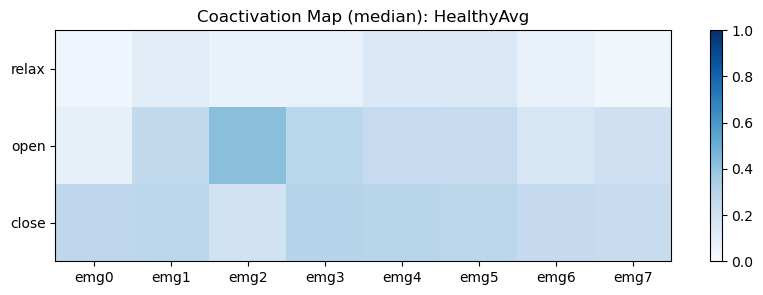

In [ ]:
healthyavg = get_all_healthy_map()
plot_coactivation_map(healthyavg,title='HealthyAvg')

### Cross-correlation

In [ ]:
def cross_correlate(cm1, cm2):
    values=[]
    for i in range(3):
        values.append(np.correlate(cm1.iloc[i,:].values, cm2.iloc[i,:].values))
    return values, np.mean(values)

In [ ]:
cross_correlate(healthy1, healthy1)

([array([0.07359342]), array([0.94731561]), array([0.82590803])],
 0.6156056870919979)

In [ ]:
cross_correlate(healthy1, healthyavg)

([array([0.06601766]), array([0.6653599]), array([0.66060246])],
 0.46399334184610314)

In [ ]:
cross_correlate(stroke1, healthyavg)

([array([0.17666693]), array([0.63548333]), array([0.97491867])],
 0.5956896416640146)

In [ ]:
cross_correlate(stroke2, healthyavg)

([array([0.28583319]), array([1.21973803]), array([1.31407574])],
 0.939882318073174)

,Unnamed: 0,gt0emg0,gt0emg1,gt0emg2,gt0emg3,gt0emg4,gt0emg5,gt0emg6,gt0emg7,gt1emg0,...,gt2emg4,gt2emg5,gt2emg6,gt2emg7,hand,is_patient,subject_id,n,gmi,cc
0,0,0.112426,0.144828,0.090129,0.032012,0.021463,0.034722,0.032702,0.073077,0.159763,...,0.175610,0.364583,0.337349,0.265385,left,False,fa,11,0.232135,0.349471
1,0,0.077551,0.114130,0.080769,0.031250,0.019319,0.030645,0.030405,0.070896,0.106122,...,0.121435,0.177419,0.327703,0.354478,left,False,fa,11,0.210155,0.305129
2,0,0.083333,0.099138,0.074586,0.046707,0.033912,0.046610,0.028646,0.038760,0.100000,...,0.143533,0.223164,0.236979,0.157946,left,False,fa,13,0.176162,0.245612
3,0,0.048140,0.089404,0.090395,0.075780,0.062963,0.072886,0.024476,0.025200,0.059081,...,0.165278,0.214286,0.165210,0.113402,left,False,fa,13,0.164662,0.236393
4,0,0.041379,0.210054,0.064480,0.028322,0.082822,0.177632,0.086310,0.042386,0.073892,...,0.159509,0.217105,0.122024,0.171115,right,False,xw,11,0.313938,0.326423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,0,0.038596,0.530973,0.061437,0.037736,0.159624,0.175141,0.100000,0.043088,0.069006,...,0.333333,0.242938,0.148000,0.111311,right,False,yc,13,0.311812,0.452426
157,0,0.020871,0.042484,0.021891,0.029248,0.079365,0.202247,0.024000,0.047368,0.093466,...,0.257937,0.393258,0.298667,0.252632,right,False,is,11,0.093181,0.447179
158,0,0.022989,0.043643,0.024819,0.096308,0.132530,0.206522,0.023873,0.021991,0.091954,...,0.331325,0.358696,0.401857,0.215278,right,False,is,11,0.144369,0.463993
159,0,0.023649,0.044402,0.028495,0.186480,0.158940,0.315315,0.035629,0.017889,0.042793,...,0.284768,0.423423,0.157957,0.290698,right,False,is,13,0.325591,0.399490


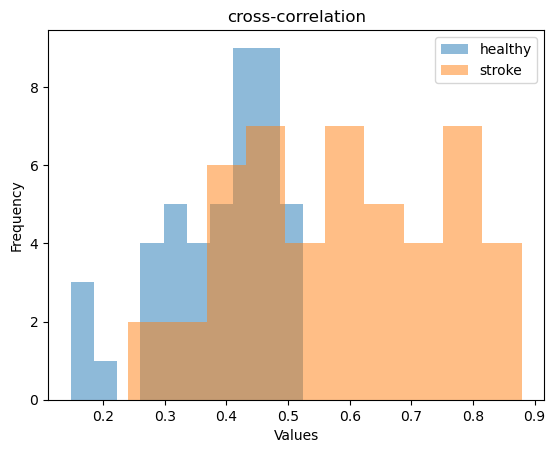

In [ ]:
def apply_cross_correlate(x):
    return (cross_correlate(array_to_cm(x.values), healthyavg)[1])

# apply_gmi(df.iloc[:, 2:25])
df['cc'] = df.iloc[:, 1:25].apply(apply_cross_correlate, axis=1) 
display(df)
plt.hist([df.cc[(df.is_patient==False) & (df.hand=='right')]], stacked=False, bins=10, alpha=0.5)
plt.hist([df.cc[(df.is_patient==True) & (df.hand=='right')]], stacked=False, bins=10, alpha=0.5)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('cross-correlation')
plt.legend(['healthy', 'stroke'])
plt.show()

### Pearson

In [ ]:
from scipy.stats import pearsonr
def pearson(cm1, cm2):
    values=[]
    for i in range(3):
        corr, _ = pearsonr(cm1.iloc[i,:].values, cm2.iloc[i,:].values)
        values.append(corr)
    return values

In [ ]:
pearson(healthy1, healthy1)

[1.0, 1.0, 0.9999999999999996]

In [ ]:
pearson(healthy1, healthyavg)

[0.832994646202059, 0.8763876779150461, 0.8241422037563737]

In [ ]:
pearson(stroke1, healthyavg)

[-0.5608350255624999, 0.15727048996373244, -0.7976282536896486]

In [ ]:
pearson(stroke2, healthyavg)

[-0.22521197386676894, 0.7118056635690471, -0.33797397485585845]

### GMI

In [ ]:
def gradient(arr):
    grad = np.empty_like(arr)
    grad[:-1] = np.diff(arr)
    grad[-1] = arr[0]-arr[-1]
    return grad

def mi(x, y, bins=10):
    # compute joint histogram
    hist_2d, x_edges, y_edges = np.histogram2d(x, y, bins=bins)
    # normalize
    pxy = hist_2d / float(np.sum(hist_2d))
    px = np.sum(pxy, axis=1)
    py = np.sum(pxy, axis=0)
    px_py = np.outer(px, py)
    nonzero = pxy > 0
    mi = np.sum(pxy[nonzero] * np.log(pxy[nonzero] / px_py[nonzero]))
    return mi

def g(x, y):
    gradx = gradient(x)
    grady = gradient(y)
    G = 0
    for i in range(len(x)):
        G += np.arccos(np.dot(gradx[i], grady[i]) / (abs(gradx[i]) * abs(grady[i]))) * min(abs(gradx[i]), abs(grady[i]))
    return G

def gmi(cm1, cm2, bins=10):
    values=[]
    for i in range(3):
        G = g(cm1.iloc[i,:], cm2.iloc[i,:])
        I = mi(cm1.iloc[i,:].values, cm2.iloc[i,:].values, bins)
        values.append(G*I)
    return values, np.mean(values)

In [ ]:
gmi(healthy1, healthy1)

/var/folders/yd/vqpl9gqn5nqfzr41g9_g0t940000gq/T/ipykernel_33592/2653691510.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  grad[-1] = arr[0]-arr[-1]


([0.0, 0.0, 0.0], 0.0)

In [ ]:
gmi(healthy1, healthyavg)

/var/folders/yd/vqpl9gqn5nqfzr41g9_g0t940000gq/T/ipykernel_33592/2653691510.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  grad[-1] = arr[0]-arr[-1]


([0.0, 0.255427865965929, 0.1776796124684604], 0.14436915947812978)

In [ ]:
gmi(stroke1, healthyavg)

/var/folders/yd/vqpl9gqn5nqfzr41g9_g0t940000gq/T/ipykernel_33592/2653691510.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  grad[-1] = arr[0]-arr[-1]


([0.8310207639538951, 1.2838376067077644, 1.256010181548387],
 1.123622850736682)

In [ ]:
gmi(stroke2, healthyavg)

/var/folders/yd/vqpl9gqn5nqfzr41g9_g0t940000gq/T/ipykernel_33592/2653691510.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  grad[-1] = arr[0]-arr[-1]


([0.9277315812823436, 0.2080190783775749, 0.2803982780290259],
 0.4720496458963148)

In [ ]:
df.iloc[:, 1:25]

,gt0emg0,gt0emg1,gt0emg2,gt0emg3,gt0emg4,gt0emg5,gt0emg6,gt0emg7,gt1emg0,gt1emg1,...,gt1emg6,gt1emg7,gt2emg0,gt2emg1,gt2emg2,gt2emg3,gt2emg4,gt2emg5,gt2emg6,gt2emg7
0,0.112426,0.144828,0.090129,0.032012,0.021463,0.034722,0.032702,0.073077,0.159763,0.220690,...,0.130809,0.161538,0.301775,0.317241,0.326180,0.332317,0.175610,0.364583,0.337349,0.265385
1,0.077551,0.114130,0.080769,0.031250,0.019319,0.030645,0.030405,0.070896,0.106122,0.163043,...,0.104730,0.141791,0.387755,0.347826,0.253846,0.251563,0.121435,0.177419,0.327703,0.354478
2,0.083333,0.099138,0.074586,0.046707,0.033912,0.046610,0.028646,0.038760,0.100000,0.125000,...,0.062500,0.060078,0.341667,0.250000,0.237569,0.258683,0.143533,0.223164,0.236979,0.157946
3,0.048140,0.089404,0.090395,0.075780,0.062963,0.072886,0.024476,0.025200,0.059081,0.105960,...,0.042832,0.045819,0.221007,0.221854,0.262712,0.337296,0.165278,0.214286,0.165210,0.113402
4,0.041379,0.210054,0.064480,0.028322,0.082822,0.177632,0.086310,0.042386,0.073892,0.461400,...,0.125000,0.065934,0.211330,0.342908,0.162896,0.153595,0.159509,0.217105,0.122024,0.171115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,0.038596,0.530973,0.061437,0.037736,0.159624,0.175141,0.100000,0.043088,0.069006,0.557522,...,0.124000,0.061041,0.343860,0.469027,0.149338,0.320755,0.333333,0.242938,0.148000,0.111311
157,0.020871,0.042484,0.021891,0.029248,0.079365,0.202247,0.024000,0.047368,0.093466,0.428105,...,0.034667,0.073684,0.243648,0.375817,0.109453,0.451253,0.257937,0.393258,0.298667,0.252632
158,0.022989,0.043643,0.024819,0.096308,0.132530,0.206522,0.023873,0.021991,0.091954,0.466793,...,0.034483,0.034722,0.238506,0.335863,0.080662,0.451043,0.331325,0.358696,0.401857,0.215278
159,0.023649,0.044402,0.028495,0.186480,0.158940,0.315315,0.035629,0.017889,0.042793,0.303089,...,0.039192,0.031306,0.185811,0.212355,0.089047,0.312354,0.284768,0.423423,0.157957,0.290698


/var/folders/yd/vqpl9gqn5nqfzr41g9_g0t940000gq/T/ipykernel_33592/2653691510.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  grad[-1] = arr[0]-arr[-1]
/var/folders/yd/vqpl9gqn5nqfzr41g9_g0t940000gq/T/ipykernel_33592/2653691510.py:24: RuntimeWarning: invalid value encountered in scalar divide
  G += np.arccos(np.dot(gradx[i], grady[i]) / (abs(gradx[i]) * abs(grady[i]))) * min(abs(gradx[i]), abs(grady[i]))


,Unnamed: 0,gt0emg0,gt0emg1,gt0emg2,gt0emg3,gt0emg4,gt0emg5,gt0emg6,gt0emg7,gt1emg0,...,gt2emg3,gt2emg4,gt2emg5,gt2emg6,gt2emg7,hand,is_patient,subject_id,n,gmi
0,0,0.112426,0.144828,0.090129,0.032012,0.021463,0.034722,0.032702,0.073077,0.159763,...,0.332317,0.175610,0.364583,0.337349,0.265385,left,False,fa,11,0.232135
1,0,0.077551,0.114130,0.080769,0.031250,0.019319,0.030645,0.030405,0.070896,0.106122,...,0.251563,0.121435,0.177419,0.327703,0.354478,left,False,fa,11,0.210155
2,0,0.083333,0.099138,0.074586,0.046707,0.033912,0.046610,0.028646,0.038760,0.100000,...,0.258683,0.143533,0.223164,0.236979,0.157946,left,False,fa,13,0.176162
3,0,0.048140,0.089404,0.090395,0.075780,0.062963,0.072886,0.024476,0.025200,0.059081,...,0.337296,0.165278,0.214286,0.165210,0.113402,left,False,fa,13,0.164662
4,0,0.041379,0.210054,0.064480,0.028322,0.082822,0.177632,0.086310,0.042386,0.073892,...,0.153595,0.159509,0.217105,0.122024,0.171115,right,False,xw,11,0.313938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,0,0.038596,0.530973,0.061437,0.037736,0.159624,0.175141,0.100000,0.043088,0.069006,...,0.320755,0.333333,0.242938,0.148000,0.111311,right,False,yc,13,0.311812
157,0,0.020871,0.042484,0.021891,0.029248,0.079365,0.202247,0.024000,0.047368,0.093466,...,0.451253,0.257937,0.393258,0.298667,0.252632,right,False,is,11,0.093181
158,0,0.022989,0.043643,0.024819,0.096308,0.132530,0.206522,0.023873,0.021991,0.091954,...,0.451043,0.331325,0.358696,0.401857,0.215278,right,False,is,11,0.144369
159,0,0.023649,0.044402,0.028495,0.186480,0.158940,0.315315,0.035629,0.017889,0.042793,...,0.312354,0.284768,0.423423,0.157957,0.290698,right,False,is,13,0.325591


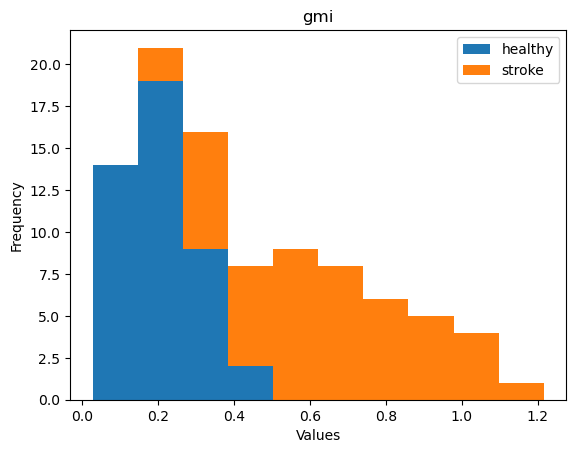

In [ ]:
def apply_gmi(x):
    # print(x.values)

    return (gmi(array_to_cm(x.values), healthyavg)[1])

# apply_gmi(df.iloc[:, 2:25])
df['gmi'] = df.iloc[:, 1:25].apply(apply_gmi, axis=1) 
display(df)
plt.hist([df.gmi[(df.is_patient==False) & (df.hand=='right')], df.gmi[(df.is_patient==True) & (df.hand=='right')]], bins=10, stacked=True)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('gmi')
plt.legend(['healthy', 'stroke'])
plt.show()

# Similarity Research: Time Domain (TDI)

# Interpretability